<a href="https://colab.research.google.com/github/NishantSutar/myprojects/blob/main/hotel_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no null values in the data. So we can go ahead with data analysis.

Check the descriptive statistics

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [10]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [11]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [34]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [14]:
df.groupby('smoker')['tip'].count()

smoker
Yes     93
No     151
Name: tip, dtype: int64

Change object data to another category(encoding)

In [35]:
df=df.replace({'sex':{'Female':0,'Male':1},'smoker':{'Yes':1,'No':0},'Time':{'Dinner':1,'Lunch':0},'day':{'Sun':3, 'Sat':2, 'Thur':0, 'Fri':1}})

In [36]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,Dinner,2
1,10.34,1.66,1,0,3,Dinner,3
2,21.01,3.50,1,0,3,Dinner,3
3,23.68,3.31,1,0,3,Dinner,2
4,24.59,3.61,0,0,3,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,Dinner,3
240,27.18,2.00,0,1,2,Dinner,2
241,22.67,2.00,1,1,2,Dinner,2
242,17.82,1.75,1,0,2,Dinner,2


Again check the statistics in the data

In [37]:
df.describe()

,total_bill,tip,sex,smoker,day,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,2.569672
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,6.000000


In [38]:

df.corr()

,total_bill,tip,sex,smoker,day,size
total_bill,1.000000,0.675734,0.144877,0.085721,0.173693,0.598315
tip,0.675734,1.000000,0.088862,0.005929,0.135499,0.489299
sex,0.144877,0.088862,1.000000,0.002816,0.230791,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.032653,-0.133178
day,0.173693,0.135499,0.230791,-0.032653,1.000000,0.165350
size,0.598315,0.489299,0.086195,-0.133178,0.165350,1.000000


In [40]:
import matplotlib.pyplot as plt

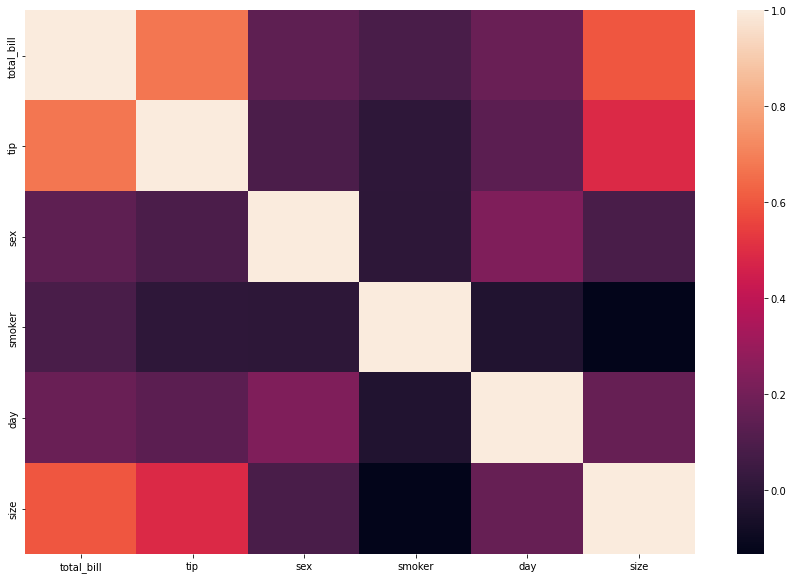

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())


Here we can see there is some correlation between tip & total_bill and tip &size

Let's plot a joinplot to see their behaviour

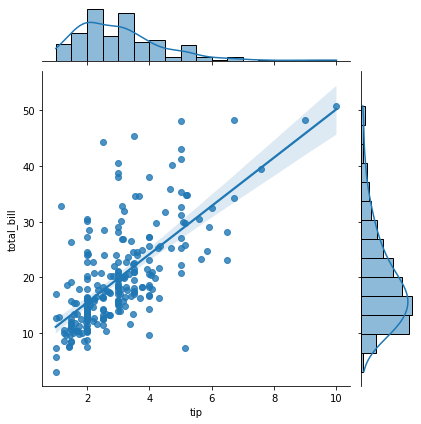

In [47]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')

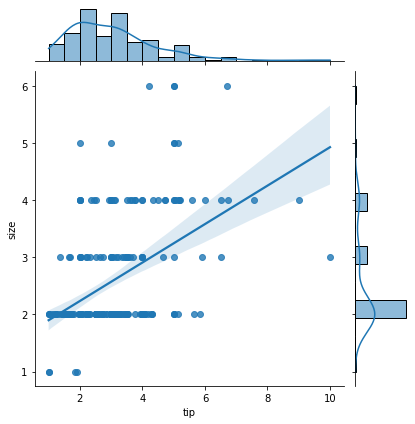

In [48]:
sns.jointplot(x='tip',y='size',data=df,kind='reg')

From the graphs we can interpret that tip & total_bill have higher correlation than tip & size. There is greater error in tip & size.

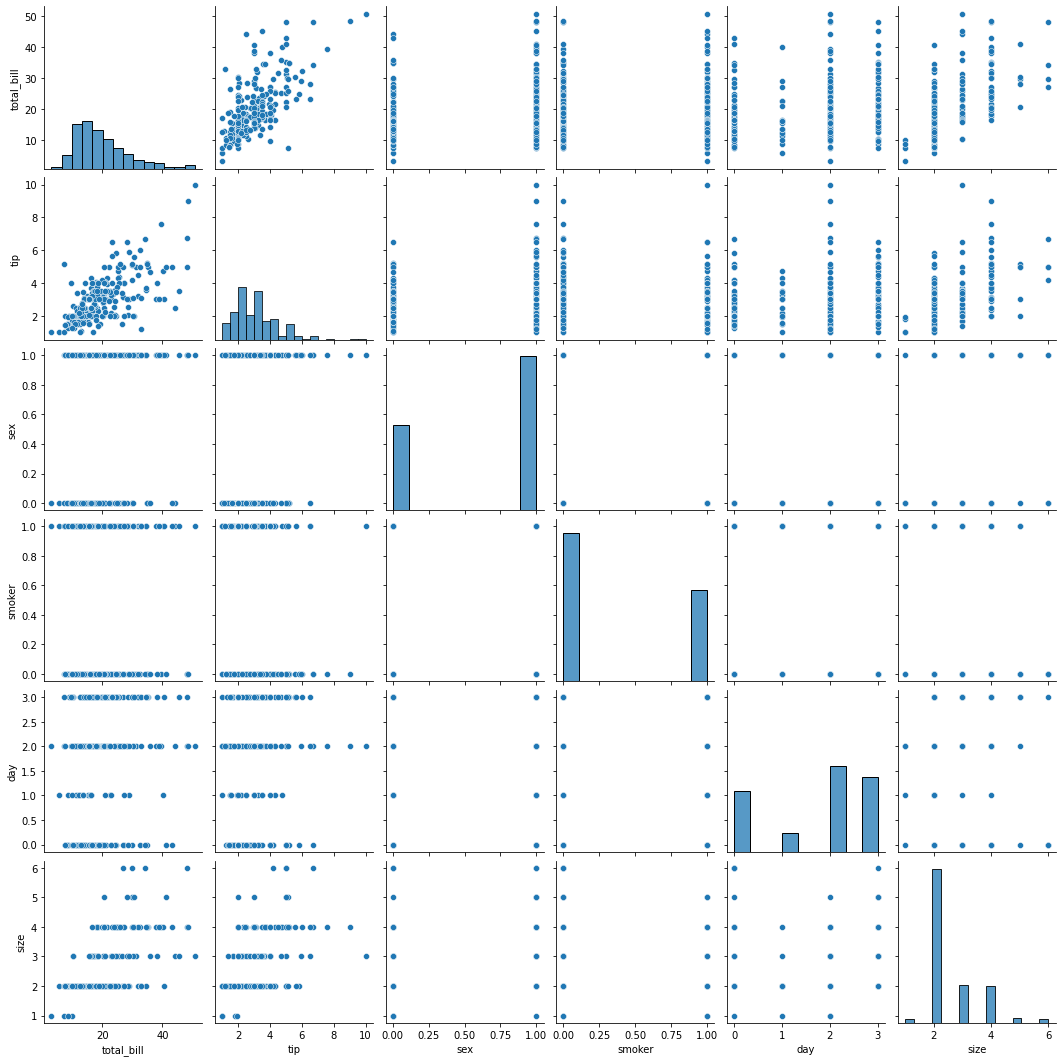

In [49]:
sns.pairplot(df)

Other columns are not impacting much to tip but let's see how object type columns are impacting the tip.

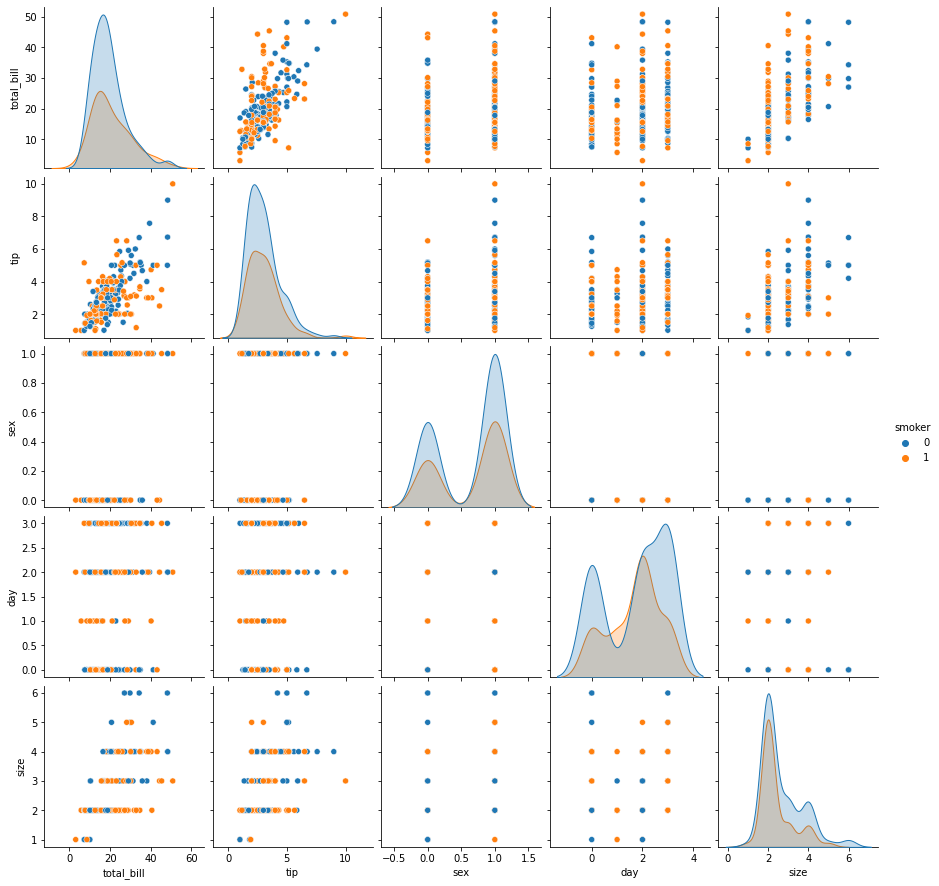

In [53]:
sns.pairplot(df,hue='smoker')

we can see majority of smokers are giving higher tips. Also most of bigger groups are non-smokers

In [72]:
df.groupby(['smoker']).agg({'tip':["count",sum,"mean"]})

tip                  
       count     sum      mean
smoker                        
0        151  451.77  2.991854
1         93  279.81  3.008710

In [76]:
df.groupby(['smoker','size'])['tip'].count()

smoker  size
0       1        2
        2       90
        3       26
        4       26
        5        3
        6        4
1       1        2
        2       66
        3       12
        4       11
        5        2
Name: tip, dtype: int64

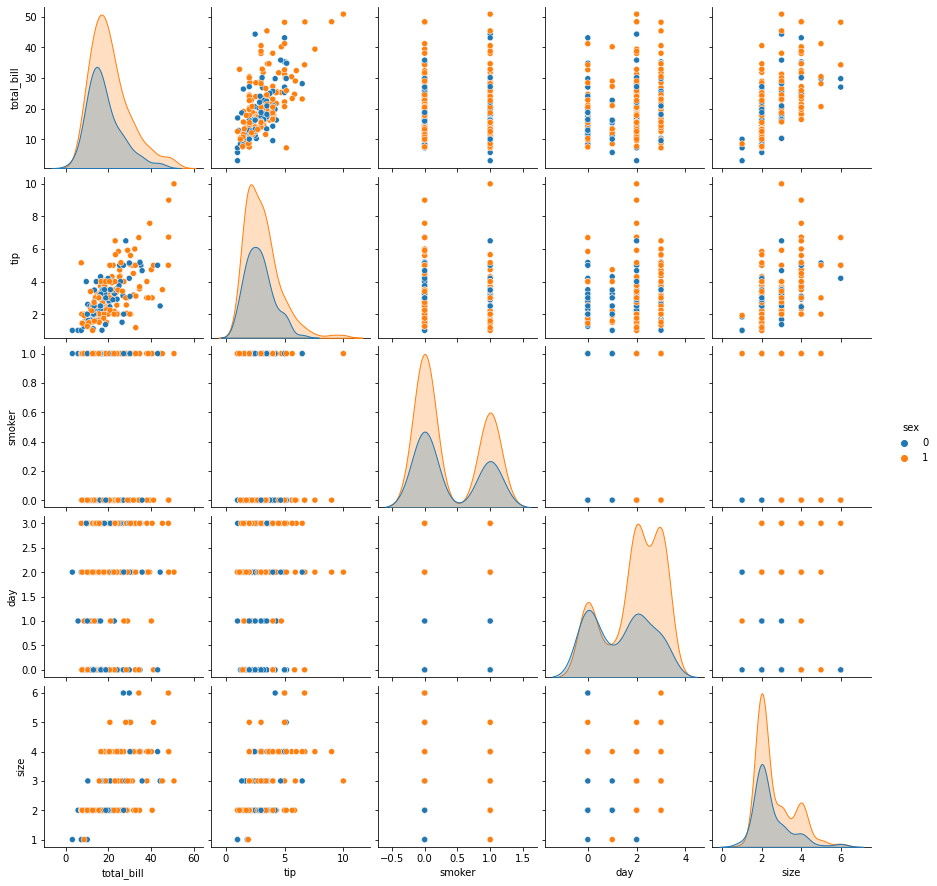

In [54]:
sns.pairplot(df,hue='sex')

Here we can see that most of higher tips are given by men. Also on sundays men pay the bill(to varify we will use group by). 

In [68]:
df.groupby(['sex','day']).agg({'total_bill':["count",sum,"mean"],'tip':["count",sum,"mean"]})

total_bill                       tip                  
             count      sum       mean count     sum      mean
sex day                                                       
0   0           32   534.89  16.715312    32   82.42  2.575625
    1            9   127.31  14.145556     9   25.03  2.781111
    2           28   551.05  19.680357    28   78.45  2.801786
    3           18   357.70  19.872222    18   60.61  3.367222
1   0           30   561.44  18.714667    30   89.41  2.980333
    1           10   198.57  19.857000    10   26.93  2.693000
    2           59  1227.35  20.802542    59  181.95  3.083898
    3           58  1269.46  21.887241    58  186.78  3.220345

Though we have seen higher tips are given by most of men, on avarage women give higher tips. Generally men pays for more number of times than women.

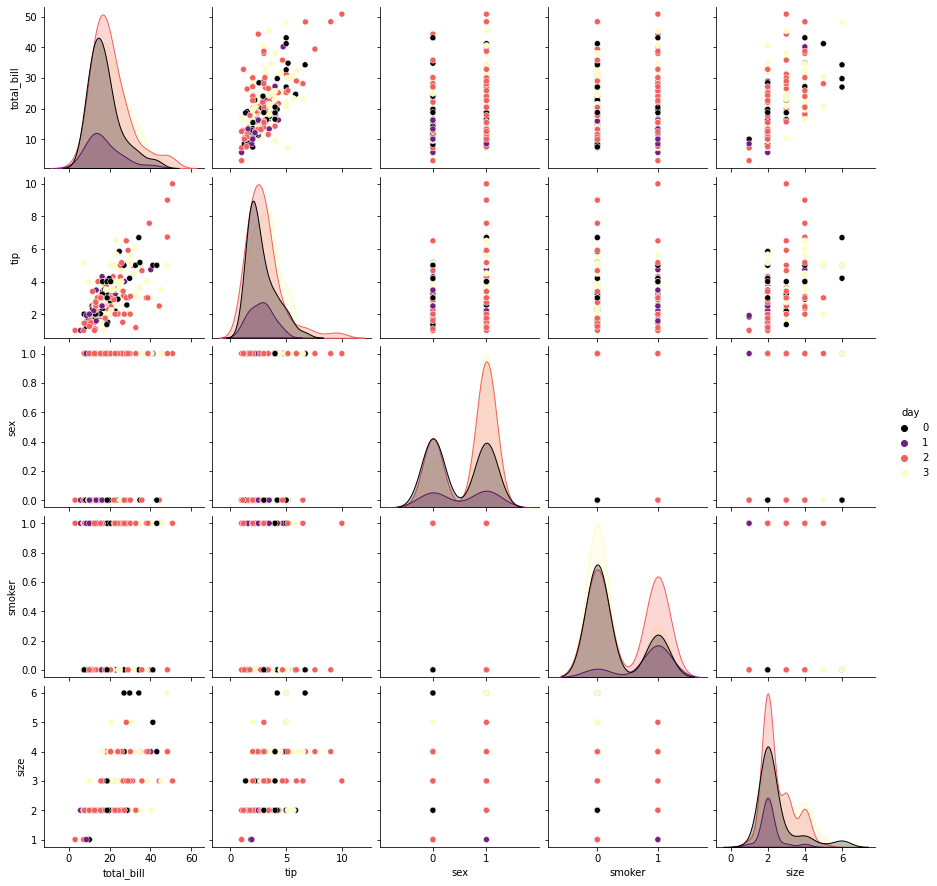

In [59]:
sns.pairplot(df,hue='day',palette='magma')

Here we can see sundays have higher total_bill. Lets varify the observation.

In [69]:
df.groupby(['day']).agg({'total_bill':["count",sum,"mean"],'tip':["count",sum,"mean"]})

total_bill                       tip                  
         count      sum       mean count     sum      mean
day                                                       
0           62  1096.33  17.682742    62  171.83  2.771452
1           19   325.88  17.151579    19   51.96  2.734737
2           87  1778.40  20.441379    87  260.40  2.993103
3           76  1627.16  21.410000    76  247.39  3.255132

Now we can see avarage bill and tip on sundays is higher than all other days. Also weekends are busy days for the hotel.

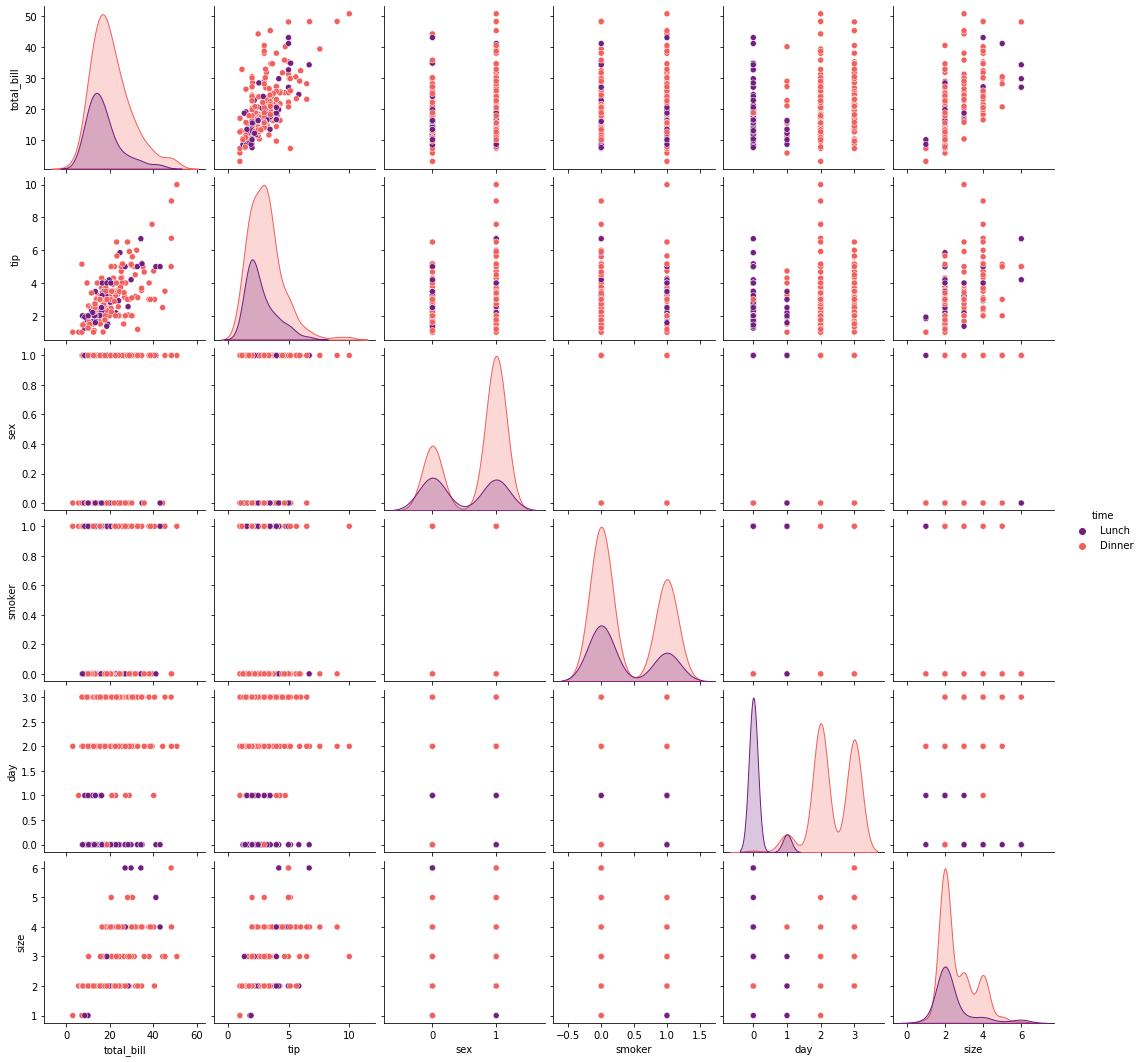

In [77]:
sns.pairplot(df,hue='time',palette='magma')

Single person is coming usually for lunch i.e. generally groups are coming for dinner. More tips are given on dinner also there is higher total_bill.

In [78]:
df=df.replace({'time':{'Lunch':0,'Dinner':1}})

Density plot of tip and total_bill

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


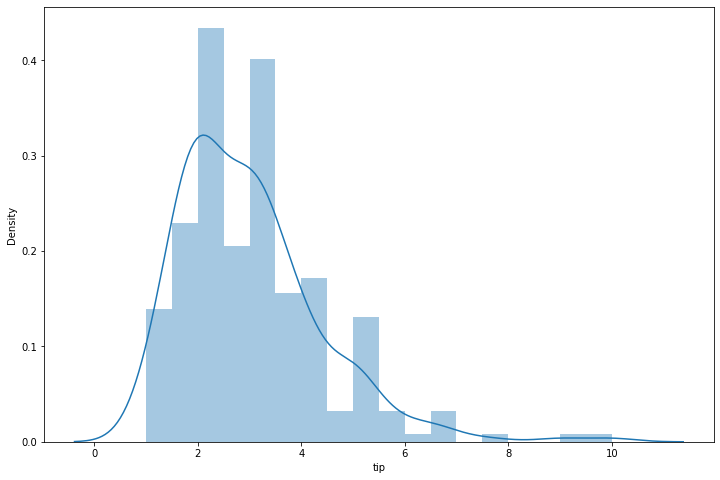

In [84]:
plt.figure(figsize=(12,8))
sns.distplot(df['tip'])
plt.show()

Generally a tip of 2-4 is given by the customers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


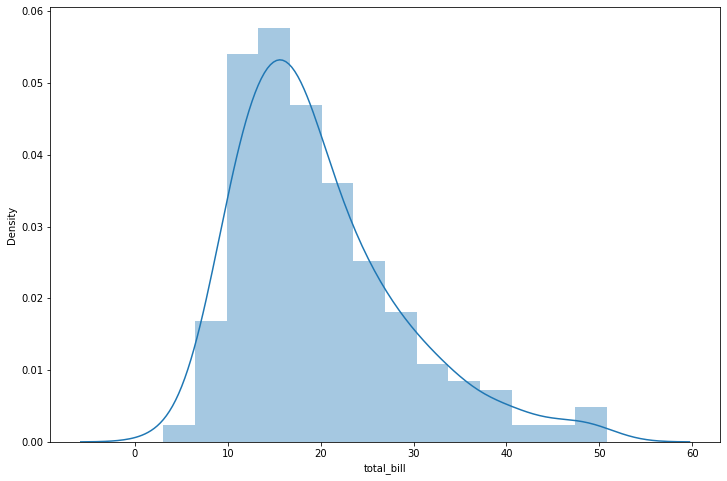

In [83]:
plt.figure(figsize=(12,8))
sns.distplot(df['total_bill'])
plt.show()

Most of the bill is in between 10-30.

Countplot of categorical data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


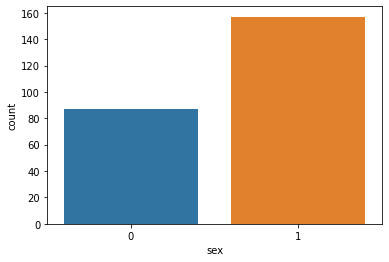

In [88]:
plt.figure(figsize=(6,4))
sns.countplot('sex',data=df)
plt.show()

The ratio of men to female customers is nearly 2:1. So we can say number of male customers is double than the number of female customers.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


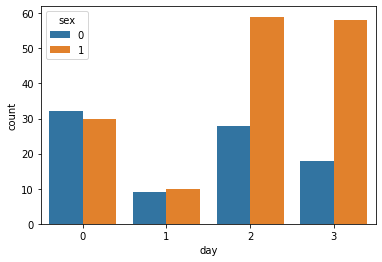

In [124]:
plt.figure(figsize=(6,4))
sns.countplot('day',data=df,hue='sex')
plt.show()

This shows Weekends are very busy days and also friday does not have much rush. More male come on weekends compared to females.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


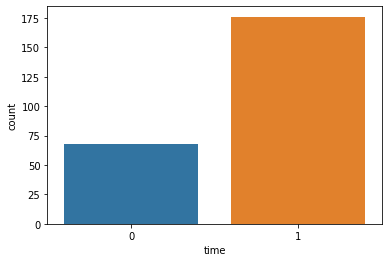

In [90]:
plt.figure(figsize=(6,4))
sns.countplot('time',data=df)
plt.show()

There is more rush in dinner time than lunch time. People prefer dinner time more oftenly than the lunch time to visit a hotel.

In [91]:
df['size'].sum()

627

In [105]:
gender=df.groupby('sex')['size'].sum().reset_index()

In [109]:
gender

,sex,size
0,0,214
1,1,413


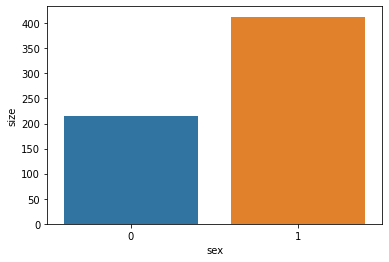

In [113]:
sns.barplot(x='sex',y='size',data=gender)

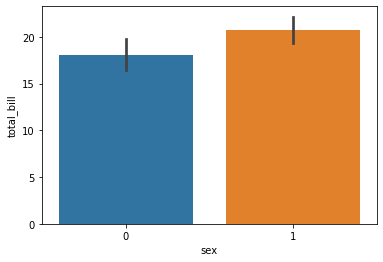

In [114]:
sns.barplot(x='sex',y='total_bill',data=df)

Compare smokers and non smokers in different category using barplot

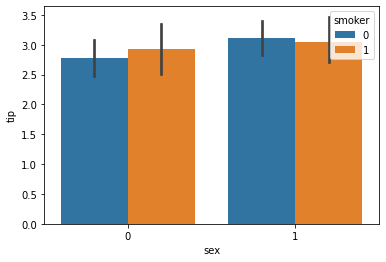

In [120]:
sns.barplot(x='sex',y='tip',data=df,hue='smoker')

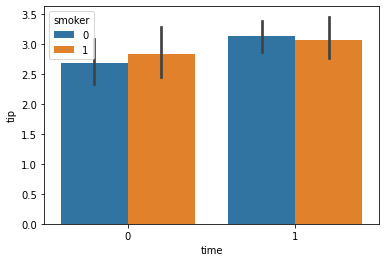

In [119]:
sns.barplot(x='time',y='tip',data=df,hue='smoker')

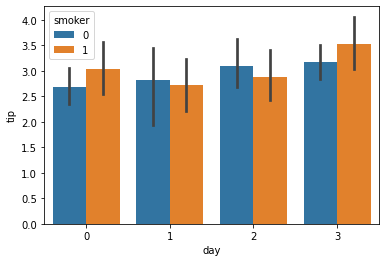

In [123]:
sns.barplot(x='day',y='tip',data=df,hue='smoker')

Observe that the ratio of smoker and non-smoker does not depends on any category.

Boxplot to find outliers in the data

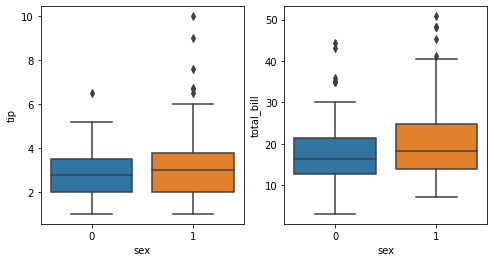

In [130]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='sex',y='tip')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='sex',y='total_bill')


More men give higher tips and pays higher bills. There is more chances that a man can give more tip than average tip than women.

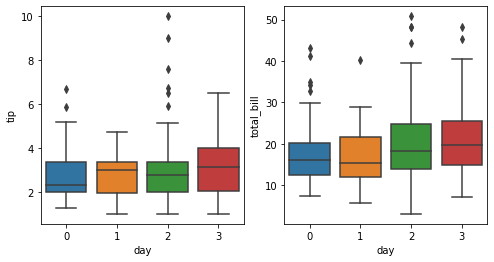

In [131]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='day',y='tip')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='day',y='total_bill')


There are more outliers for tip on Saturday on higher side. So higher tips are given on Saturdays. But avarage higher tip is given on Sunday.

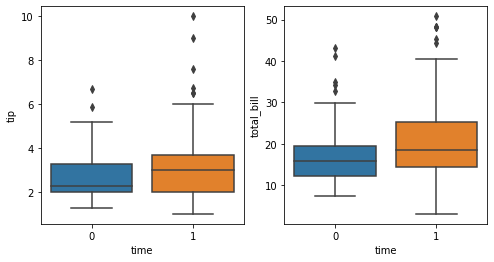

In [132]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='time',y='tip')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='time',y='total_bill')


Dinner time have more outliers for both tip and total_bill on higher side. Hotel can have higher profit for dinner time.

We will see voilin plot on the data.

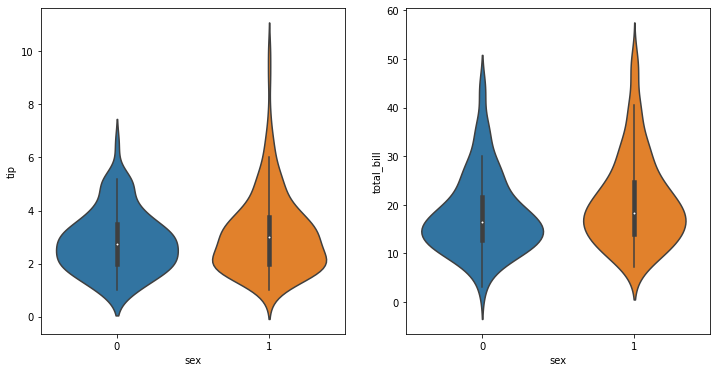

In [135]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(data=df,x='sex',y='tip')

plt.subplot(1,2,2)
sns.violinplot(data=df,x='sex',y='total_bill')

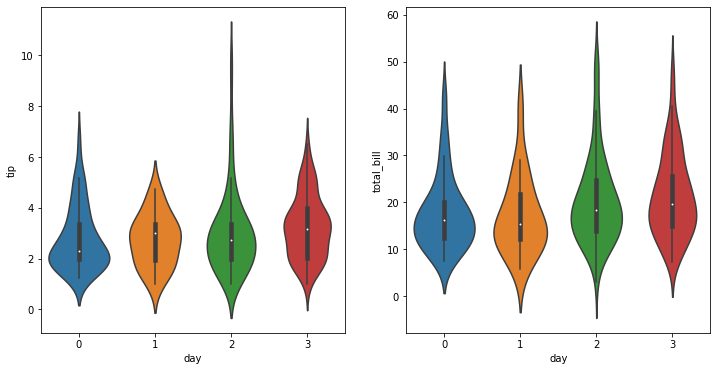

In [136]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(data=df,x='day',y='tip')

plt.subplot(1,2,2)
sns.violinplot(data=df,x='day',y='total_bill')

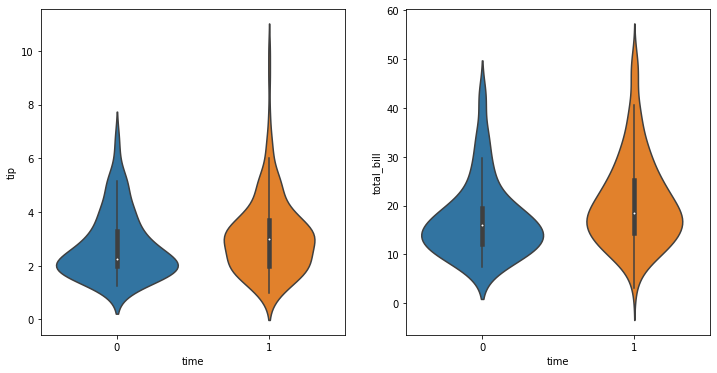

In [139]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(data=df,x='time',y='tip')

plt.subplot(1,2,2)
sns.violinplot(data=df,x='time',y='total_bill')